# Notebook para evaluación del SRI Booleano

## Configuración inicial

In [1]:
# Cranfield load
from engine.cranfield import CranfieldGetter as Getter
from engine.cranfield import dataset

In [2]:
# Model load
from engine.boolean import BooleanIRS as IRS

In [3]:
# Get id of all documents
all_docs=[d.doc_id for d in dataset.docs_iter()]

In [4]:
# Setup system
IRS = IRS()
IRS.data_getter=Getter()

In [5]:
# Index the documents
IRS.add_documents(all_docs)

In [6]:
# Import Qrels and metrics
import engine.metrics as m
from engine.cranfield import CranfieldQrelsGetter as QrelGetter

# Maximum relevance definition
class MaxRelMetric(m.IRSMetric):
    def calculate(self, irs, qrel) -> float:
        return max((r for _,r in irs.pre_query(qrel.query)))

METRICS = {
    'Time': m.TimeMetric(), # In seconds
    'Prec':m.PrecisionMetric(),
    'Rec':m.RecoveryMetric(),
    'F1':m.F1Metric(),
    'Max': MaxRelMetric()
}

In [7]:
# Qrels load
QRELS=QrelGetter().getqrels()

In [8]:
from typing import Iterable

# Result of each metric in the model
RESULTS={}

## Cálculo

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def print_results(metric):
    results = RESULTS[metric]

    ser = pd.Series(pd.cut(results, 15))
    grouped=ser.groupby(ser).count()

    df=pd.DataFrame(grouped.values,grouped.index)
    df.index.name='Intervalo'
    df.columns=['Frecuencia Absoluta']

    total=df['Frecuencia Absoluta'].sum()

    df['Frecuencia Relativa']=df['Frecuencia Absoluta']/total
    df['Porcentaje']=df['Frecuencia Relativa']*100
    df['Marca de Clase']=df.index.map(lambda x:x.mid)

    print(f'Promedio: {np.mean(results):.5f}')
    print(f'Máximo: {np.max(results):.5f}')
    print(f'Mínimo: {np.min(results):.5f}')
    print(f"Moda: {[float(x) for x in (df.loc[df['Frecuencia Absoluta'] == df.max()['Frecuencia Absoluta']]['Marca de Clase']).values]}")
    print(f"Mediana: {np.median(results):.5f}")
    print(f"Desviación estándar: {np.std(results):.5f}")
    
    print("\nCuartiles:")
    print(f"\tQ1:{np.quantile(results,.25)}")
    print(f"\tQ3:{np.quantile(results,.75)}")

    return df


def plot(metric):
    # Plotting
    plt.style.use('ggplot')
    plt.figure(figsize=(9, 5))
    plt.hist(RESULTS[metric], bins=15)

    return plt.show()


### Tiempo de procesado de la consulta en segundos

In [11]:
metric='Time'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [12]:
print_results(metric)

Promedio: 0.01514
Máximo: 0.05300
Mínimo: 0.00400
Moda: [0.012150000000000001]
Mediana: 0.01380
Desviación estándar: 0.00687

Cuartiles:
	Q1:0.0102
	Q3:0.019


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.00395, 0.00727]",17,0.075556,7.555556,0.005610
"(0.00727, 0.0105]",41,0.182222,18.222222,0.008885
"(0.0105, 0.0138]",55,0.244444,24.444444,0.012150
"(0.0138, 0.0171]",39,0.173333,17.333333,0.015450
"(0.0171, 0.0203]",33,0.146667,14.666667,0.018700
"(0.0203, 0.0236]",24,0.106667,10.666667,0.021950
"(0.0236, 0.0269]",7,0.031111,3.111111,0.025250
"(0.0269, 0.0301]",2,0.008889,0.888889,0.028500
"(0.0301, 0.0334]",2,0.008889,0.888889,0.031750


#### Histograma de frecuencia

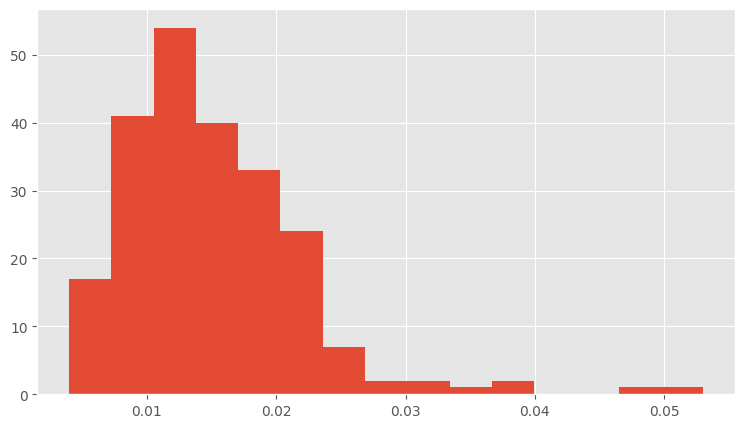

In [13]:
plot(metric)

### Precisión

In [14]:
metric='Prec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [15]:
print_results(metric)

Promedio: 0.92941
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.9665]
Mediana: 1.00000
Desviación estándar: 0.24542

Cuartiles:
	Q1:1.0
	Q3:1.0


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",12,0.053333,5.333333,0.03285
"(0.0667, 0.133]",0,0.000000,0.000000,0.09985
"(0.133, 0.2]",2,0.008889,0.888889,0.16650
"(0.2, 0.267]",1,0.004444,0.444444,0.23350
"(0.267, 0.333]",0,0.000000,0.000000,0.30000
"(0.333, 0.4]",2,0.008889,0.888889,0.36650
"(0.4, 0.467]",0,0.000000,0.000000,0.43350
"(0.467, 0.533]",0,0.000000,0.000000,0.50000
"(0.533, 0.6]",0,0.000000,0.000000,0.56650


#### Histograma de frecuencia

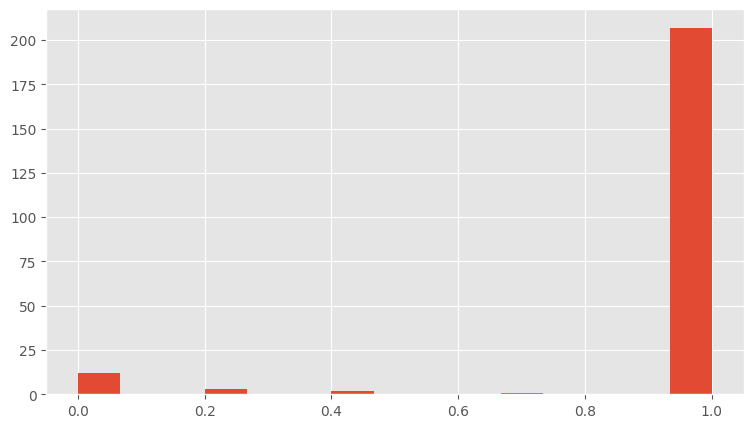

In [16]:
plot(metric)

### Recobrado

In [17]:
metric='Rec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [18]:
print_results(metric)

Promedio: 0.05762
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.00000
Desviación estándar: 0.21963

Cuartiles:
	Q1:0.0
	Q3:0.0


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",206,0.915556,91.555556,0.03285
"(0.0667, 0.133]",1,0.004444,0.444444,0.09985
"(0.133, 0.2]",2,0.008889,0.888889,0.16650
"(0.2, 0.267]",2,0.008889,0.888889,0.23350
"(0.267, 0.333]",2,0.008889,0.888889,0.30000
"(0.333, 0.4]",0,0.000000,0.000000,0.36650
"(0.4, 0.467]",0,0.000000,0.000000,0.43350
"(0.467, 0.533]",1,0.004444,0.444444,0.50000
"(0.533, 0.6]",0,0.000000,0.000000,0.56650


#### Histograma de frecuencia

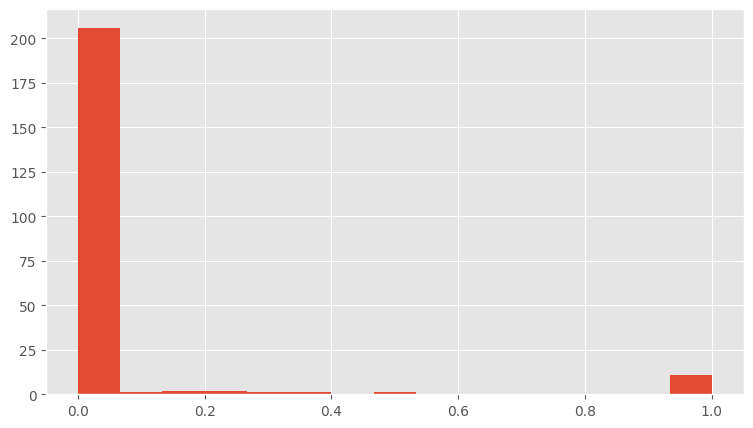

In [19]:
plot(metric)

### Formula F1

In [20]:
metric='F1'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [21]:
print_results(metric)

Promedio: 0.05599
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.00000
Desviación estándar: 0.21175

Cuartiles:
	Q1:0.0
	Q3:0.0


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",206,0.915556,91.555556,0.03285
"(0.0667, 0.133]",0,0.000000,0.000000,0.09985
"(0.133, 0.2]",1,0.004444,0.444444,0.16650
"(0.2, 0.267]",2,0.008889,0.888889,0.23350
"(0.267, 0.333]",4,0.017778,1.777778,0.30000
"(0.333, 0.4]",2,0.008889,0.888889,0.36650
"(0.4, 0.467]",0,0.000000,0.000000,0.43350
"(0.467, 0.533]",0,0.000000,0.000000,0.50000
"(0.533, 0.6]",0,0.000000,0.000000,0.56650


#### Histograma de frecuencia

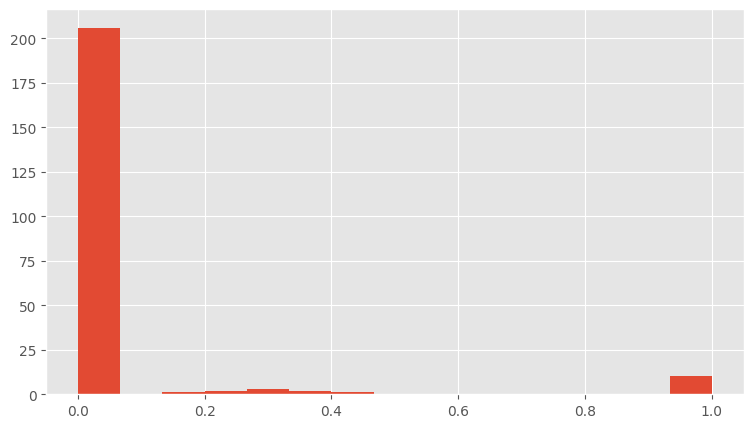

In [22]:
plot(metric)

### Relevancia máxima


In [23]:
metric='Max'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [24]:
print_results(metric)

Promedio: 0.09333
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.00000
Desviación estándar: 0.29090

Cuartiles:
	Q1:0.0
	Q3:0.0


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",204,0.906667,90.666667,0.03285
"(0.0667, 0.133]",0,0.000000,0.000000,0.09985
"(0.133, 0.2]",0,0.000000,0.000000,0.16650
"(0.2, 0.267]",0,0.000000,0.000000,0.23350
"(0.267, 0.333]",0,0.000000,0.000000,0.30000
"(0.333, 0.4]",0,0.000000,0.000000,0.36650
"(0.4, 0.467]",0,0.000000,0.000000,0.43350
"(0.467, 0.533]",0,0.000000,0.000000,0.50000
"(0.533, 0.6]",0,0.000000,0.000000,0.56650


#### Histograma de frecuencia

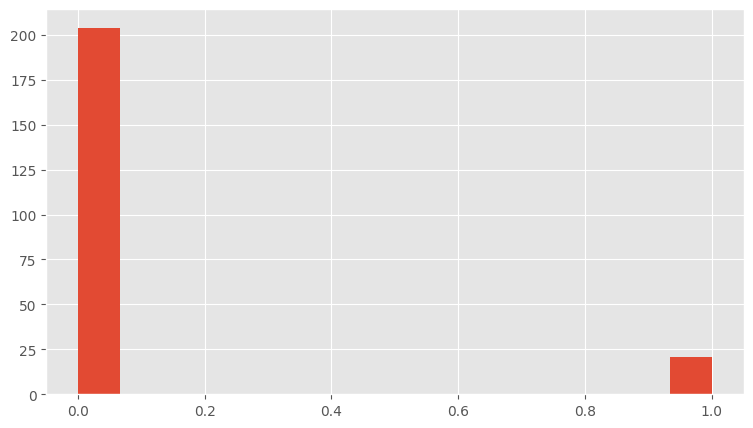

In [25]:
plot(metric)